Import Libraries

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Creating The Clusters

In [24]:
from sklearn.cluster import KMeans

Clustering With Mall Data

In [25]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [26]:
X = df.iloc[:, [1,2]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [27]:
from sklearn.preprocessing import minmax_scale

X = minmax_scale(X)

Text(0, 0.5, 'Spending Score')

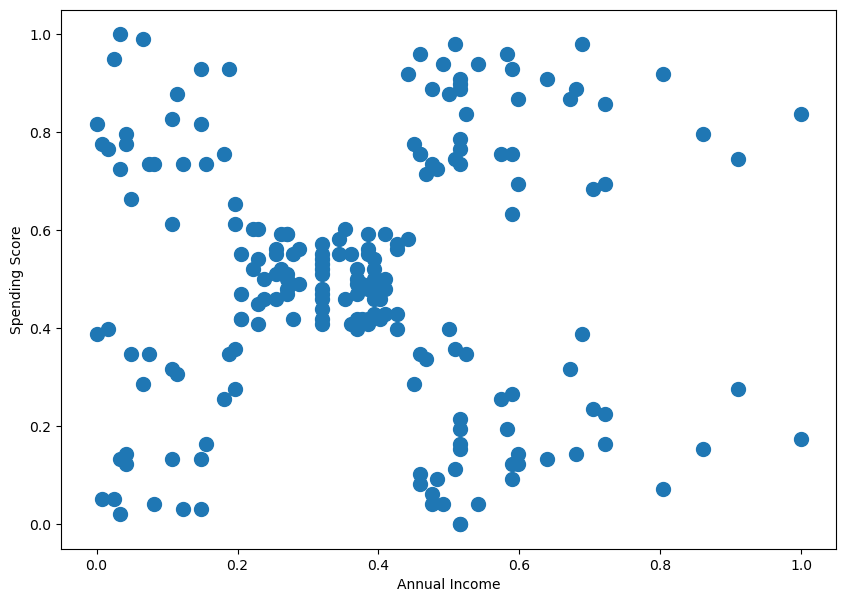

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s = 100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [29]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [30]:
kmeans.cluster_centers_ 

array([[0.09265859, 0.20319432],
       [0.32858607, 0.49706633],
       [0.59631148, 0.16921769],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

In [31]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

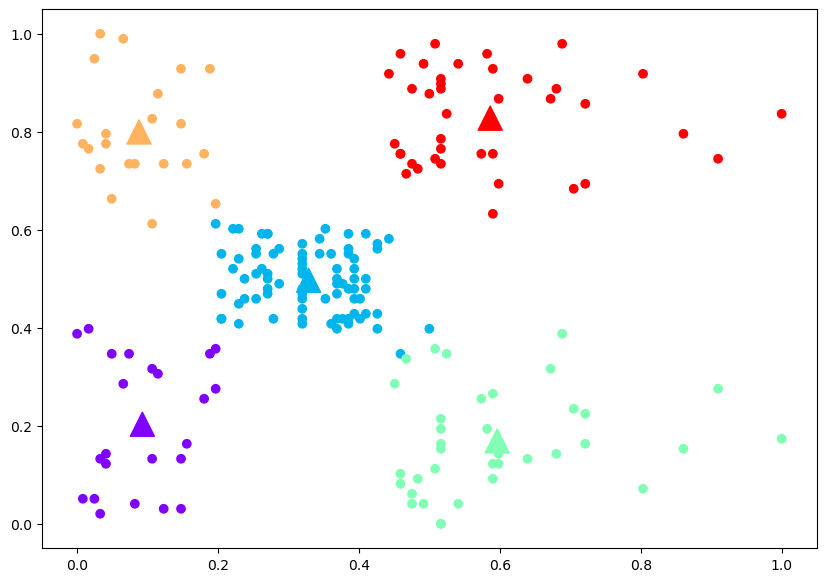

In [33]:
plt.figure(figsize = (10, 7))
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = np.unique(kmeans.labels_), cmap = "rainbow", s = 300, marker = "^")

In [35]:
kmeans.inertia_

3.5847551149309345

Text(0, 0.5, 'wcss')

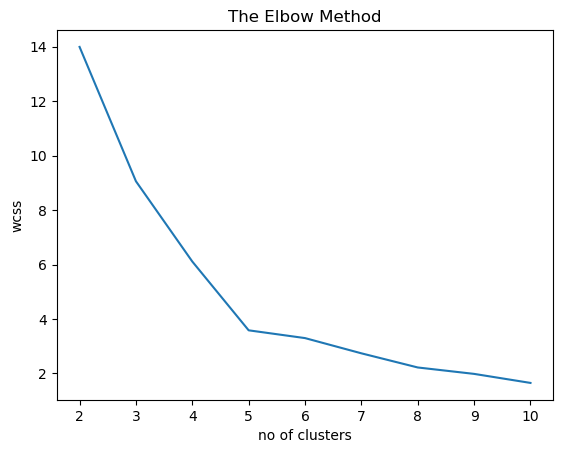

In [40]:
plt.plot(range(2, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")

## silhoutte score

In [44]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    silhouette.append([i, silhouette_score(X, kmeans.labels_)])

C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [45]:
silhouette

[[2, 0.33340205479521],
 [3, 0.4514909309424474],
 [4, 0.49620078745146784],
 [5, 0.5594854531227246],
 [6, 0.450086228341669],
 [7, 0.5054646550870812],
 [8, 0.4505274263307038],
 [9, 0.41723029461224875],
 [10, 0.4314032848994334]]

# n = 5 is best silhouette score